# 국제 상품 가격 데이터
파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 다루는 방법

* 국제 금가격 (LBM, 런던금은시장)
* 국제 은 가격 (LBMA, 런던 금시장협회)
* 국제 구리 가격 (LME, 런던 금속 거래소)
* 국제 원유가격 (서부 텍사스 중질유, 두바이유, 북해 브렌트유)

<img src="http://i.imgur.com/qVjtvea.png" >

### 2017 http://fb.com/financedata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

!pip install pandas-datareader

# 국제 금가격 (런던 금시장)
Gold Fixing Price in London Bullion Market (based in U.S. Dollar)
* (HSBC, 도이치은행 등) 5개 은행이 회의를 통해 Gold Fixing Price 발표
* 하루에 두 번 (10:30 AM, 3:00 PM 런던시간)

FRED (세인트루이스 연방준비은행 경제 데이터)
* https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM
* https://fred.stlouisfed.org/series/GOLDPMGBD228NLBM

- df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2000-01-01')
- print('row count:', len(df_gold))
- df_gold.tail(10)
- df_gold.plot()

# 국제 은 가격
* https://www.quandl.com/ 다양한 금융, 경제 데이터와 API를 제공)
*  "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격

- 영국 은(silver)
>- df_silver = pdr.DataReader('LBMA/SILVER', 'quandl', start='2000-01-01')
>- print('row count:', len(df_silver))
>- df_silver.tail(10)
>- df_silver['USD'].plot()

# 국제 구리 가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격), 3Months(3개월 선물가격), 15Months(15개월 선물가격) 등

- LME 구리 가격
>- df_copper = pdr.DataReader('LME/PR_CU', 'quandl', start='2000-01-01')
>- print('row count:', len(df_copper))
>- df_copper.tail(10)
>- df_copper['CashSeller&Settlement'].plot()

# 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표 
1. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
1. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.
* 서부 텍사스 중질유(WTI Crude):  https://fred.stlouisfed.org/series/POILWTIUSDM
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

In [2]:
# 서부 텍사스 중질유(WTI Crude), monthly
df_wt = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_wt))
df_wt.head(10)
#df_wt.tail(10)

row count: 304


,POILWTIUSDM
DATE,
2000-01-01,27.224286
2000-02-01,29.362381
2000-03-01,29.892174
2000-04-01,25.799000
2000-05-01,28.833478
2000-06-01,31.859091
2000-07-01,29.983810
2000-08-01,31.218696
2000-09-01,33.860000


<Axes: xlabel='DATE'>

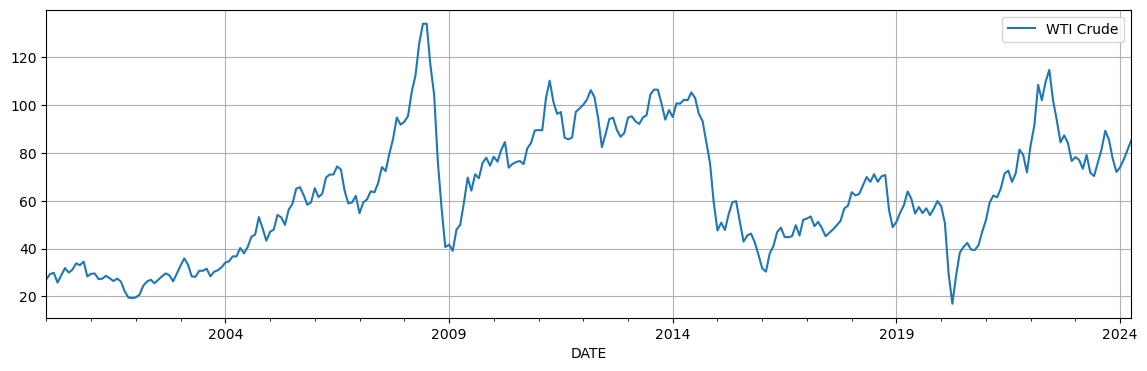

In [7]:
df_wt.columns = ['WTI Crude']
df_wt.plot()

In [8]:
# 두바이유 (Dubai Crude), monthly
df_du = pdr.DataReader('POILDUBUSDM', 'fred', start='2000-01-01')

print('row count:', len(df_du))
df_du.tail(10)

row count: 292


,POILDUBUSDM
DATE,
2023-07-01,80.645714
2023-08-01,86.123043
2023-09-01,93.238571
2023-10-01,88.787727
2023-11-01,82.640909
2023-12-01,77.569524
2024-01-01,79.582174
2024-02-01,82.809048
2024-03-01,86.633810


<Axes: xlabel='DATE'>

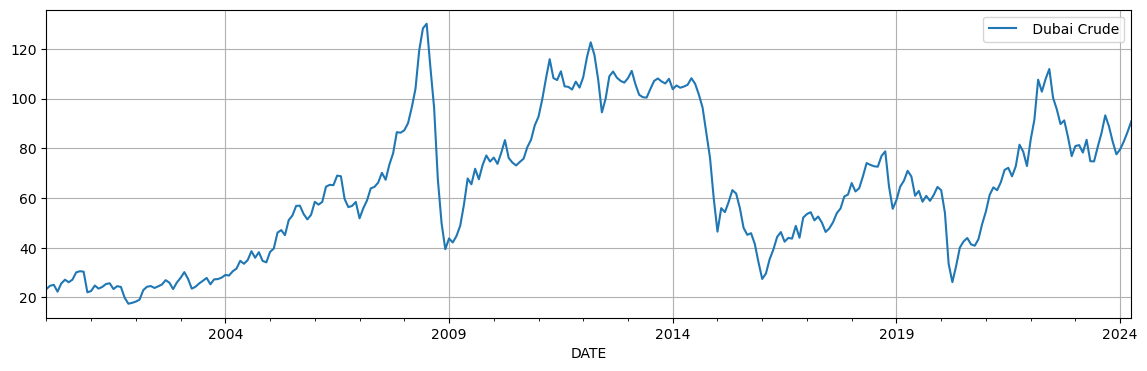

In [9]:
df_du.columns = [' Dubai Crude']
df_du.plot()

# 두 가지 이상의 유가 보기

DataReader 함수의 항목을 리스트로 전달하면, 한번에 여러 항목의 데이터를 가져올 수 있다

In [10]:
# POILDUBUSDM: 두바이유
# POILWTIUSDM: 서부 텍사스 중질유

df_oil = pdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'], 'fred', start='2000-01-01')

print('row count:', len(df_oil))
df_oil.tail(10)

row count: 292


,POILDUBUSDM,POILWTIUSDM
DATE,,
2023-07-01,80.645714,75.766667
2023-08-01,86.123043,81.372609
2023-09-01,93.238571,89.240952
2023-10-01,88.787727,85.469091
2023-11-01,82.640909,77.575455
2023-12-01,77.569524,72.019524
2024-01-01,79.582174,74.003043
2024-02-01,82.809048,77.363810
2024-03-01,86.633810,81.405714


<Axes: xlabel='DATE'>

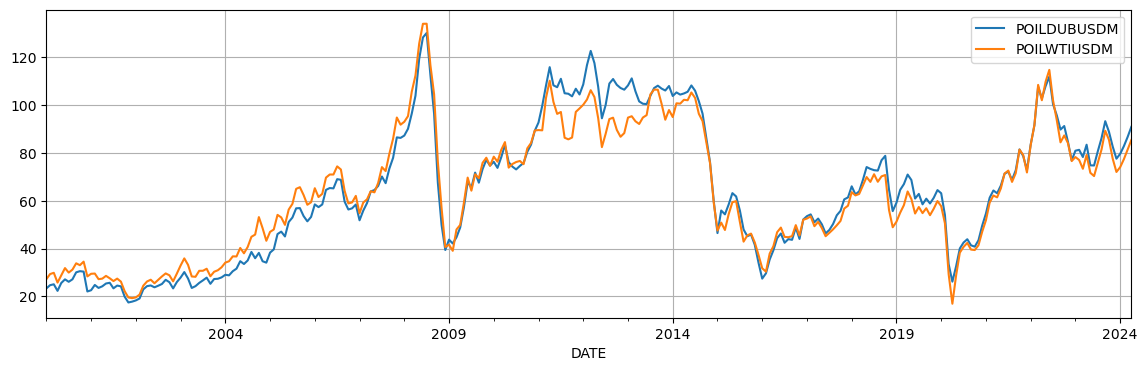

In [11]:
df_oil.plot()

# 두 가격의 차이
두 가격을 함께 놓고 보니, 두바이유와 서부 텍사스 중질유의 가격이 거의 같으나 약간 차이가 있다. 

차이를 구해서 상세하게 살펴보자

In [12]:
df_oil['diff'] = df_oil['POILDUBUSDM'] -  df_oil['POILWTIUSDM']
df_oil.tail(10)

,POILDUBUSDM,POILWTIUSDM,diff
DATE,,,
2023-07-01,80.645714,75.766667,4.879048
2023-08-01,86.123043,81.372609,4.750435
2023-09-01,93.238571,89.240952,3.997619
2023-10-01,88.787727,85.469091,3.318636
2023-11-01,82.640909,77.575455,5.065455
2023-12-01,77.569524,72.019524,5.550000
2024-01-01,79.582174,74.003043,5.579130
2024-02-01,82.809048,77.363810,5.445238
2024-03-01,86.633810,81.405714,5.228095


<Axes: xlabel='DATE'>

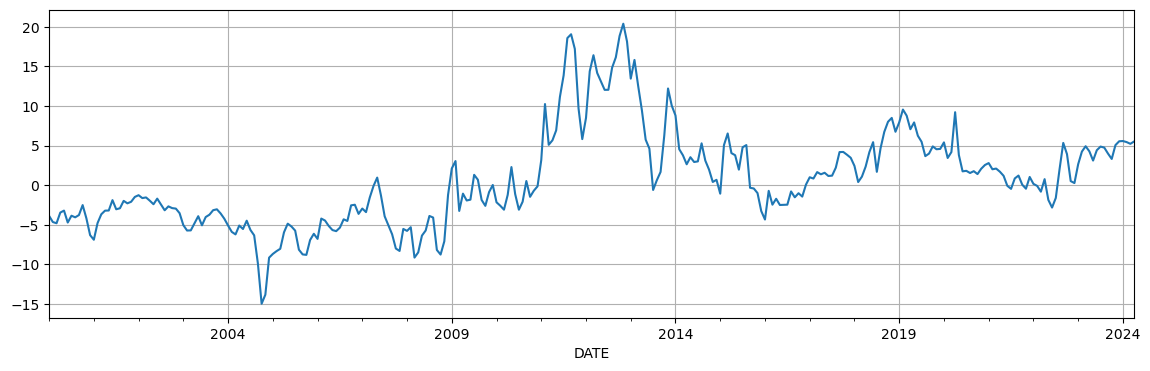

In [13]:
df_oil['diff'].plot()

가격의 차이를 좀 더 분명하게 표현해 보자. 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시한다.

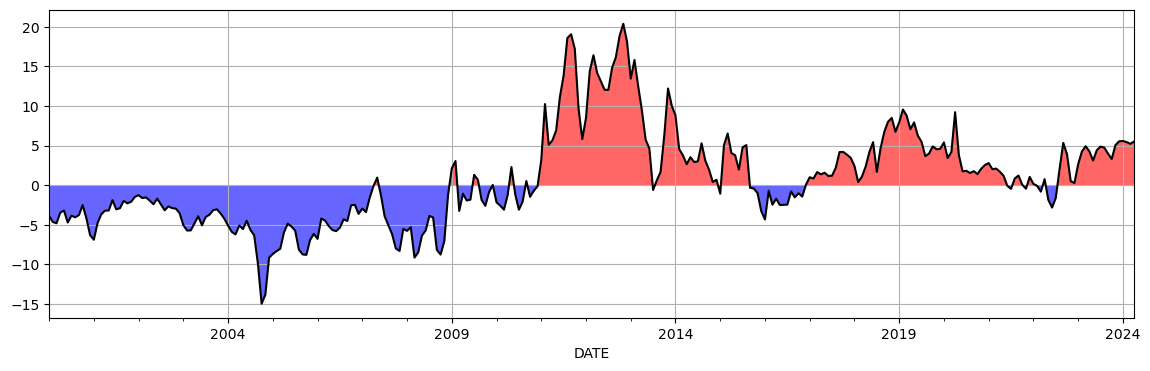

In [14]:
ax = df_oil['diff'].plot(color='k')

x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, 0, y, where=y > 0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y <= 0, facecolor='b', alpha=0.6, interpolate=True)

### 2017 http://fb.com/financedata